## The Sparks Foundation

### Problem Statement:- From the given "Iris" dataset, predict the number of clusters and represent it visually

- Name:- Aditya Rai

In [1]:
# Importing the necessary library

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Loading the data into the iris variable

df = datasets.load_iris()
iris = pd.DataFrame(df.data , columns = df.feature_names)

### Exploratory Data Analysis

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.shape

(150, 4)

In [5]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [7]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Scaling the feature because the feature has variance in the data present in them
# Using MinMaxScaler to scale down the feature into one scale

min_scaler = MinMaxScaler()
iris = pd.DataFrame(min_scaler.fit_transform(iris) , columns = iris.columns)

In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


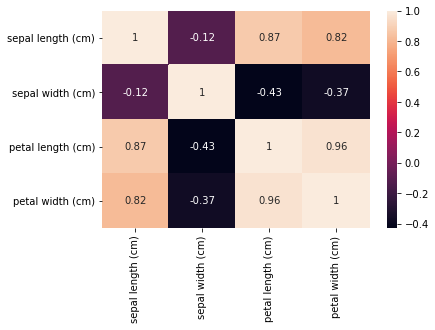

In [10]:
# Now checking the co-relation between the features.
# And here we can see that petal width and petal length are 96% co-related thus we can drop one of the
# feature from them

g = sns.heatmap(iris.corr() , annot = True)

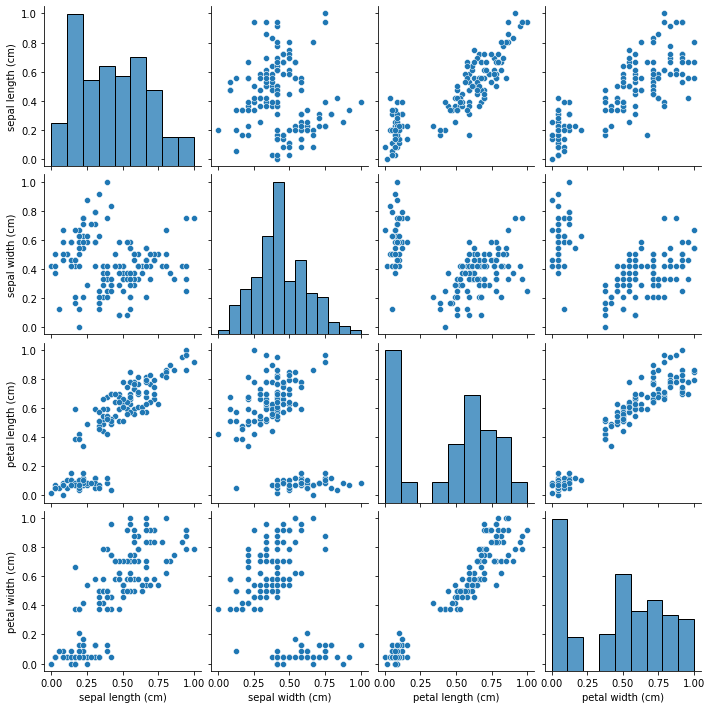

In [11]:
g = sns.pairplot(iris)

### Feature Selection

In [12]:
## Here we can see that some of the columns are highly correlated with each other 
## Thus performing feature selection to select only the best features
## To do so using the correlation method for the feature selection
## Making a function to select the necessary feature

def correlation_selection(df,threshold):
    unselected_feature = set()
    corrmat = df.corr()
    for i in range(corrmat.shape[0]):
        for j in range(i):
            rel_value = corrmat.values[i][j]
            if(rel_value >= threshold):
                unselected_feature.add(corrmat.index[i])
    return unselected_feature

In [13]:
unselected_feature = correlation_selection(iris,0.90)

In [14]:
# So we have got our feature to be deleted from the dataset

unselected_feature

{'petal width (cm)'}

In [15]:
# Dropping the unselected feature

iris.drop(unselected_feature , axis = 1 ,inplace = True)

In [16]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797


In [17]:
x = iris.iloc[:, [0, 1, 2]].values

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


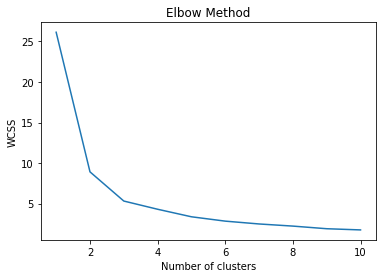

In [18]:
# Using the Elbow method we can get an idea of how many clusters to form 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
# Thus from the above diagram we can see that the number of cluster can be formed is 3

In [20]:
# Making an object of the K - Means Clustering

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [21]:
# Now making the clusters

y_predicted = km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
# Now putting this predicted value to the new feature named "Clusters"

iris["Cluster"] = y_predicted
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),Cluster
0,0.222222,0.625000,0.067797,0
1,0.166667,0.416667,0.067797,0
2,0.111111,0.500000,0.050847,0
3,0.083333,0.458333,0.084746,0
4,0.194444,0.666667,0.067797,0


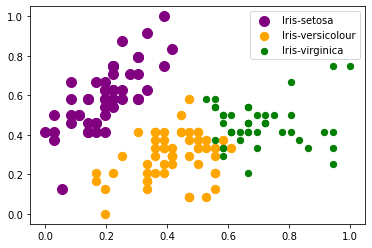

In [23]:
# Now plotting the formed clustered

plt.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 1], s = 70, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 1], s = 40, c = 'green', label = 'Iris-virginica')

# Plotting th centroids of the clusters 
plt.legend()

In [24]:
# Making a dictionary and mapping the value to the cluster feature
# Assuming that the 
# 0 is for iris-setosa
# 1 is for iris-versicolor
# 2 is for iris-virginica


class_dict = {
0:"iris-setosa",
1:"iris-versicolor",
2:"iris-virginica"
}
iris["Cluster"] = iris["Cluster"].map(class_dict)


In [25]:
# Checking the final dataset after clustering

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),Cluster
0,0.222222,0.625000,0.067797,iris-setosa
1,0.166667,0.416667,0.067797,iris-setosa
2,0.111111,0.500000,0.050847,iris-setosa
3,0.083333,0.458333,0.084746,iris-setosa
4,0.194444,0.666667,0.067797,iris-setosa
